* MAHOUVI Pâquarse, 22100770

* Chargement des packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np

# I. Introduction aux données
## Chargement des données
Description : 

La base de données utilisée pour le présent projet est composé d'un ensemble de langage de programmation (noeud). La présence d'un lien entre deux noeuds quelconque symbolisant l'existence d'une affinité entre ces deux langages. La variable `value` contenu dans le fichier `links.csv` permet de quantifier cette affinité. Cette base de données provient de kaggle.

In [2]:
warnings.filterwarnings('ignore')
G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('nodes.csv')
df_edges = pd.read_csv('links.csv')

### I.1.1. Réprésentation statique du graphe

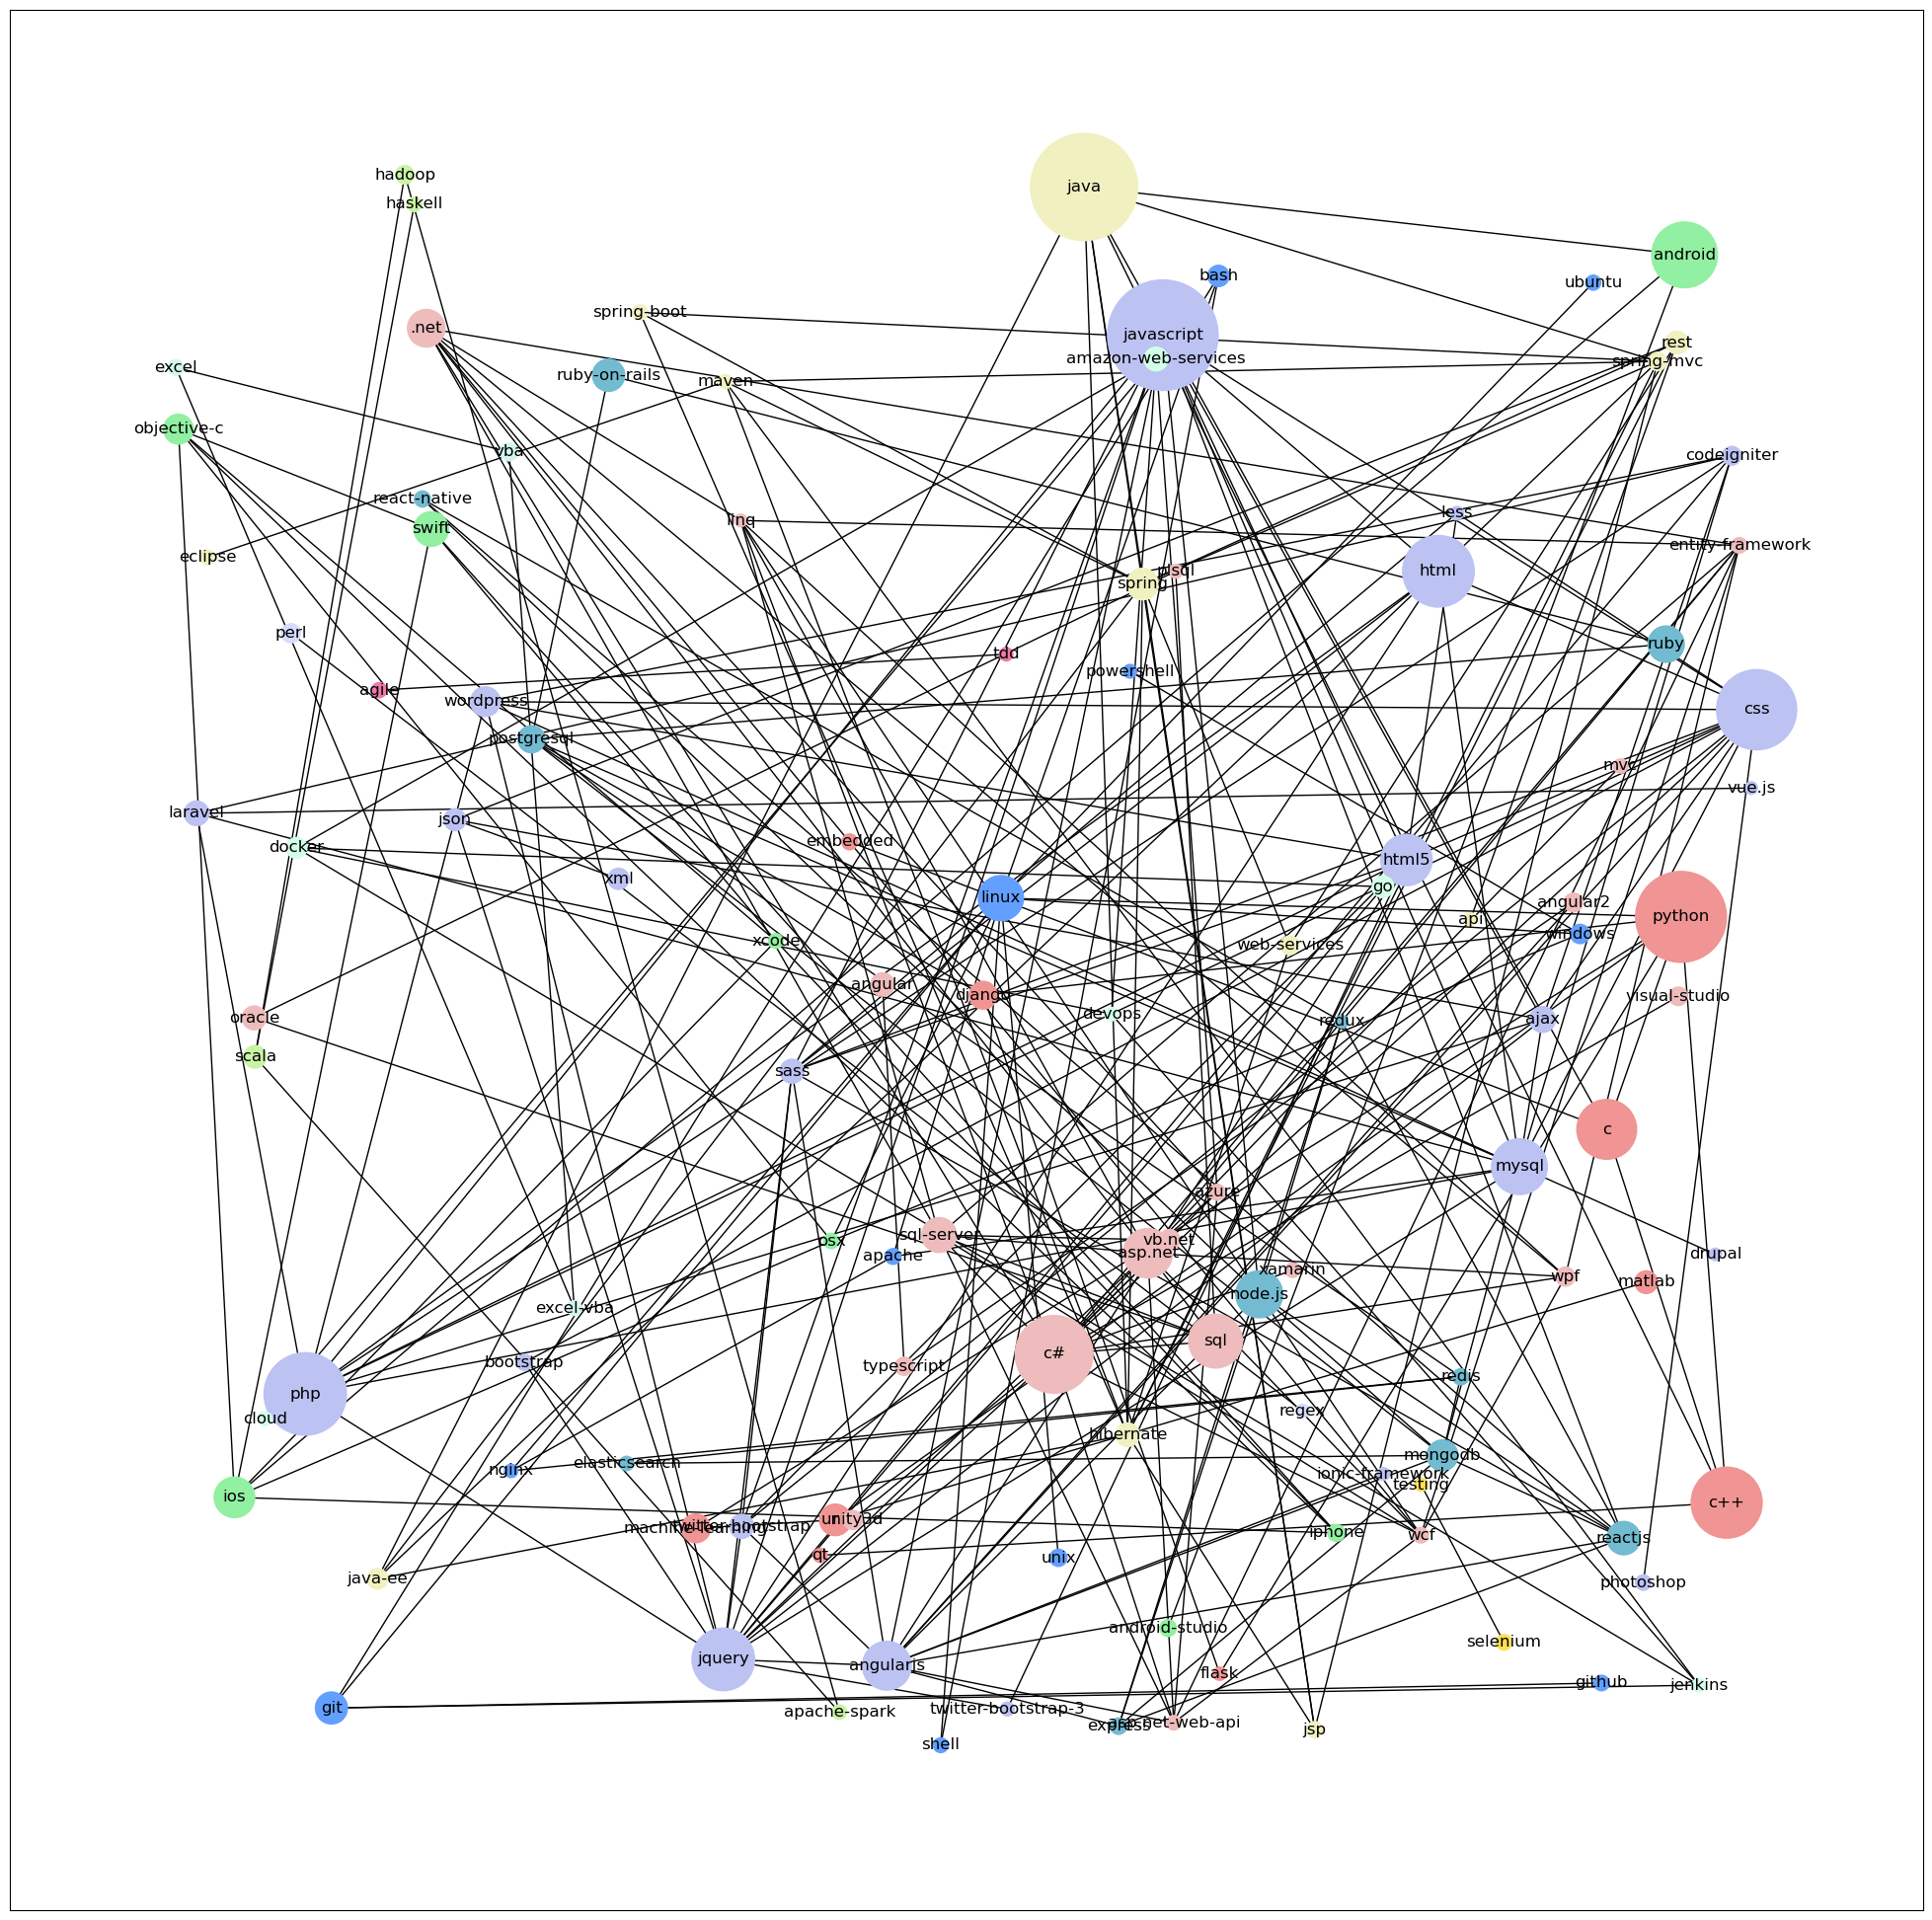

In [3]:
warnings.filterwarnings('ignore')

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
plt.figure(figsize=(25,25))
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

#nx.draw_networkx(G, pos=nx.random_layout(G))
#sum((df_nodes["nodesize"]*10 ==  sizes) == False)
nx.draw_networkx(G, pos=nx.random_layout(G), node_color = colors, node_size = sizes)

Il est important que cette répresentation statique de notre réseau ne nous permet de détecter la présence d'éventuelle composante connexe dans notre graphe `g`. En effet, ceci est dû au positionnement aléatoire des noeuds de notre réseau. On a donc opter pour une représentation dynamique de notre réseau via la librairie bokeh de python pour en apprendre plus. 

### I.1.2. Réprésentation dynamique du graphe avec bokeh

In [4]:
warnings.filterwarnings('ignore')
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
# Affichage dynamique du graphe
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)

number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(G)])
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Logiciel/language connection'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Language/logiciel", "@index"),
        ("Degree", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)
plot.height = 400
plot.width = 800
show(plot)

La représentation dynamique de notre réseau permet de remarquer la présence de six (06) composantes connexes. Par ailleurs, on remarque que cinq de ses composantes connexes ont au plus 4 noeuds. Pour aller plus loin, des statistiques descriptives seront faites

## I.2.  Statistiques descriptive

In [5]:
print("Le graphe est un graphe orienté : ", nx.is_directed(G))
print("Nombre de noeuds : ", G.number_of_nodes())
print("Le nombre de liens : ", G.number_of_edges())
print("Le nombre de composante connexe : ", nx.number_connected_components(G))
print("le dégrée moyen est :", np.mean([d for _, d in G.degree()]))
print("La densité du graphe G :", nx.density(G))
print("Le diamètre du graphe ne peut être calculé car, il n'est pas connexe")

Le graphe est un graphe orienté :  False
Nombre de noeuds :  115
Le nombre de liens :  245
Le nombre de composante connexe :  6
le dégrée moyen est : 4.260869565217392
La densité du graphe G : 0.03737604881769641
Le diamètre du graphe ne peut être calculé car, il n'est pas connexe


* On remarque que notre graphe est non connexe. En effet, elle contient six (06) composantes connexes
    - La première étape sera d'identifier le nombre de sommet contenu dans chaque composante connexe

In [6]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[102, 4, 3, 2, 2, 2]

On remaque que la première composante connexe, contient 102 sur les 115 sommets de notre graphe. Pour la suite du projet, mes principales analyses seront faites sur cette composante connexe, étant donné qu'il n'y a pas un grand intérêt à étudier un graphe à 2 ou 3 sommets. On retient donc la composante connexe avec le plus grand nombre de sommet, soit 102 sommets. Ce dernier sera noté g et sera utilisé pour la suite de l'étude.

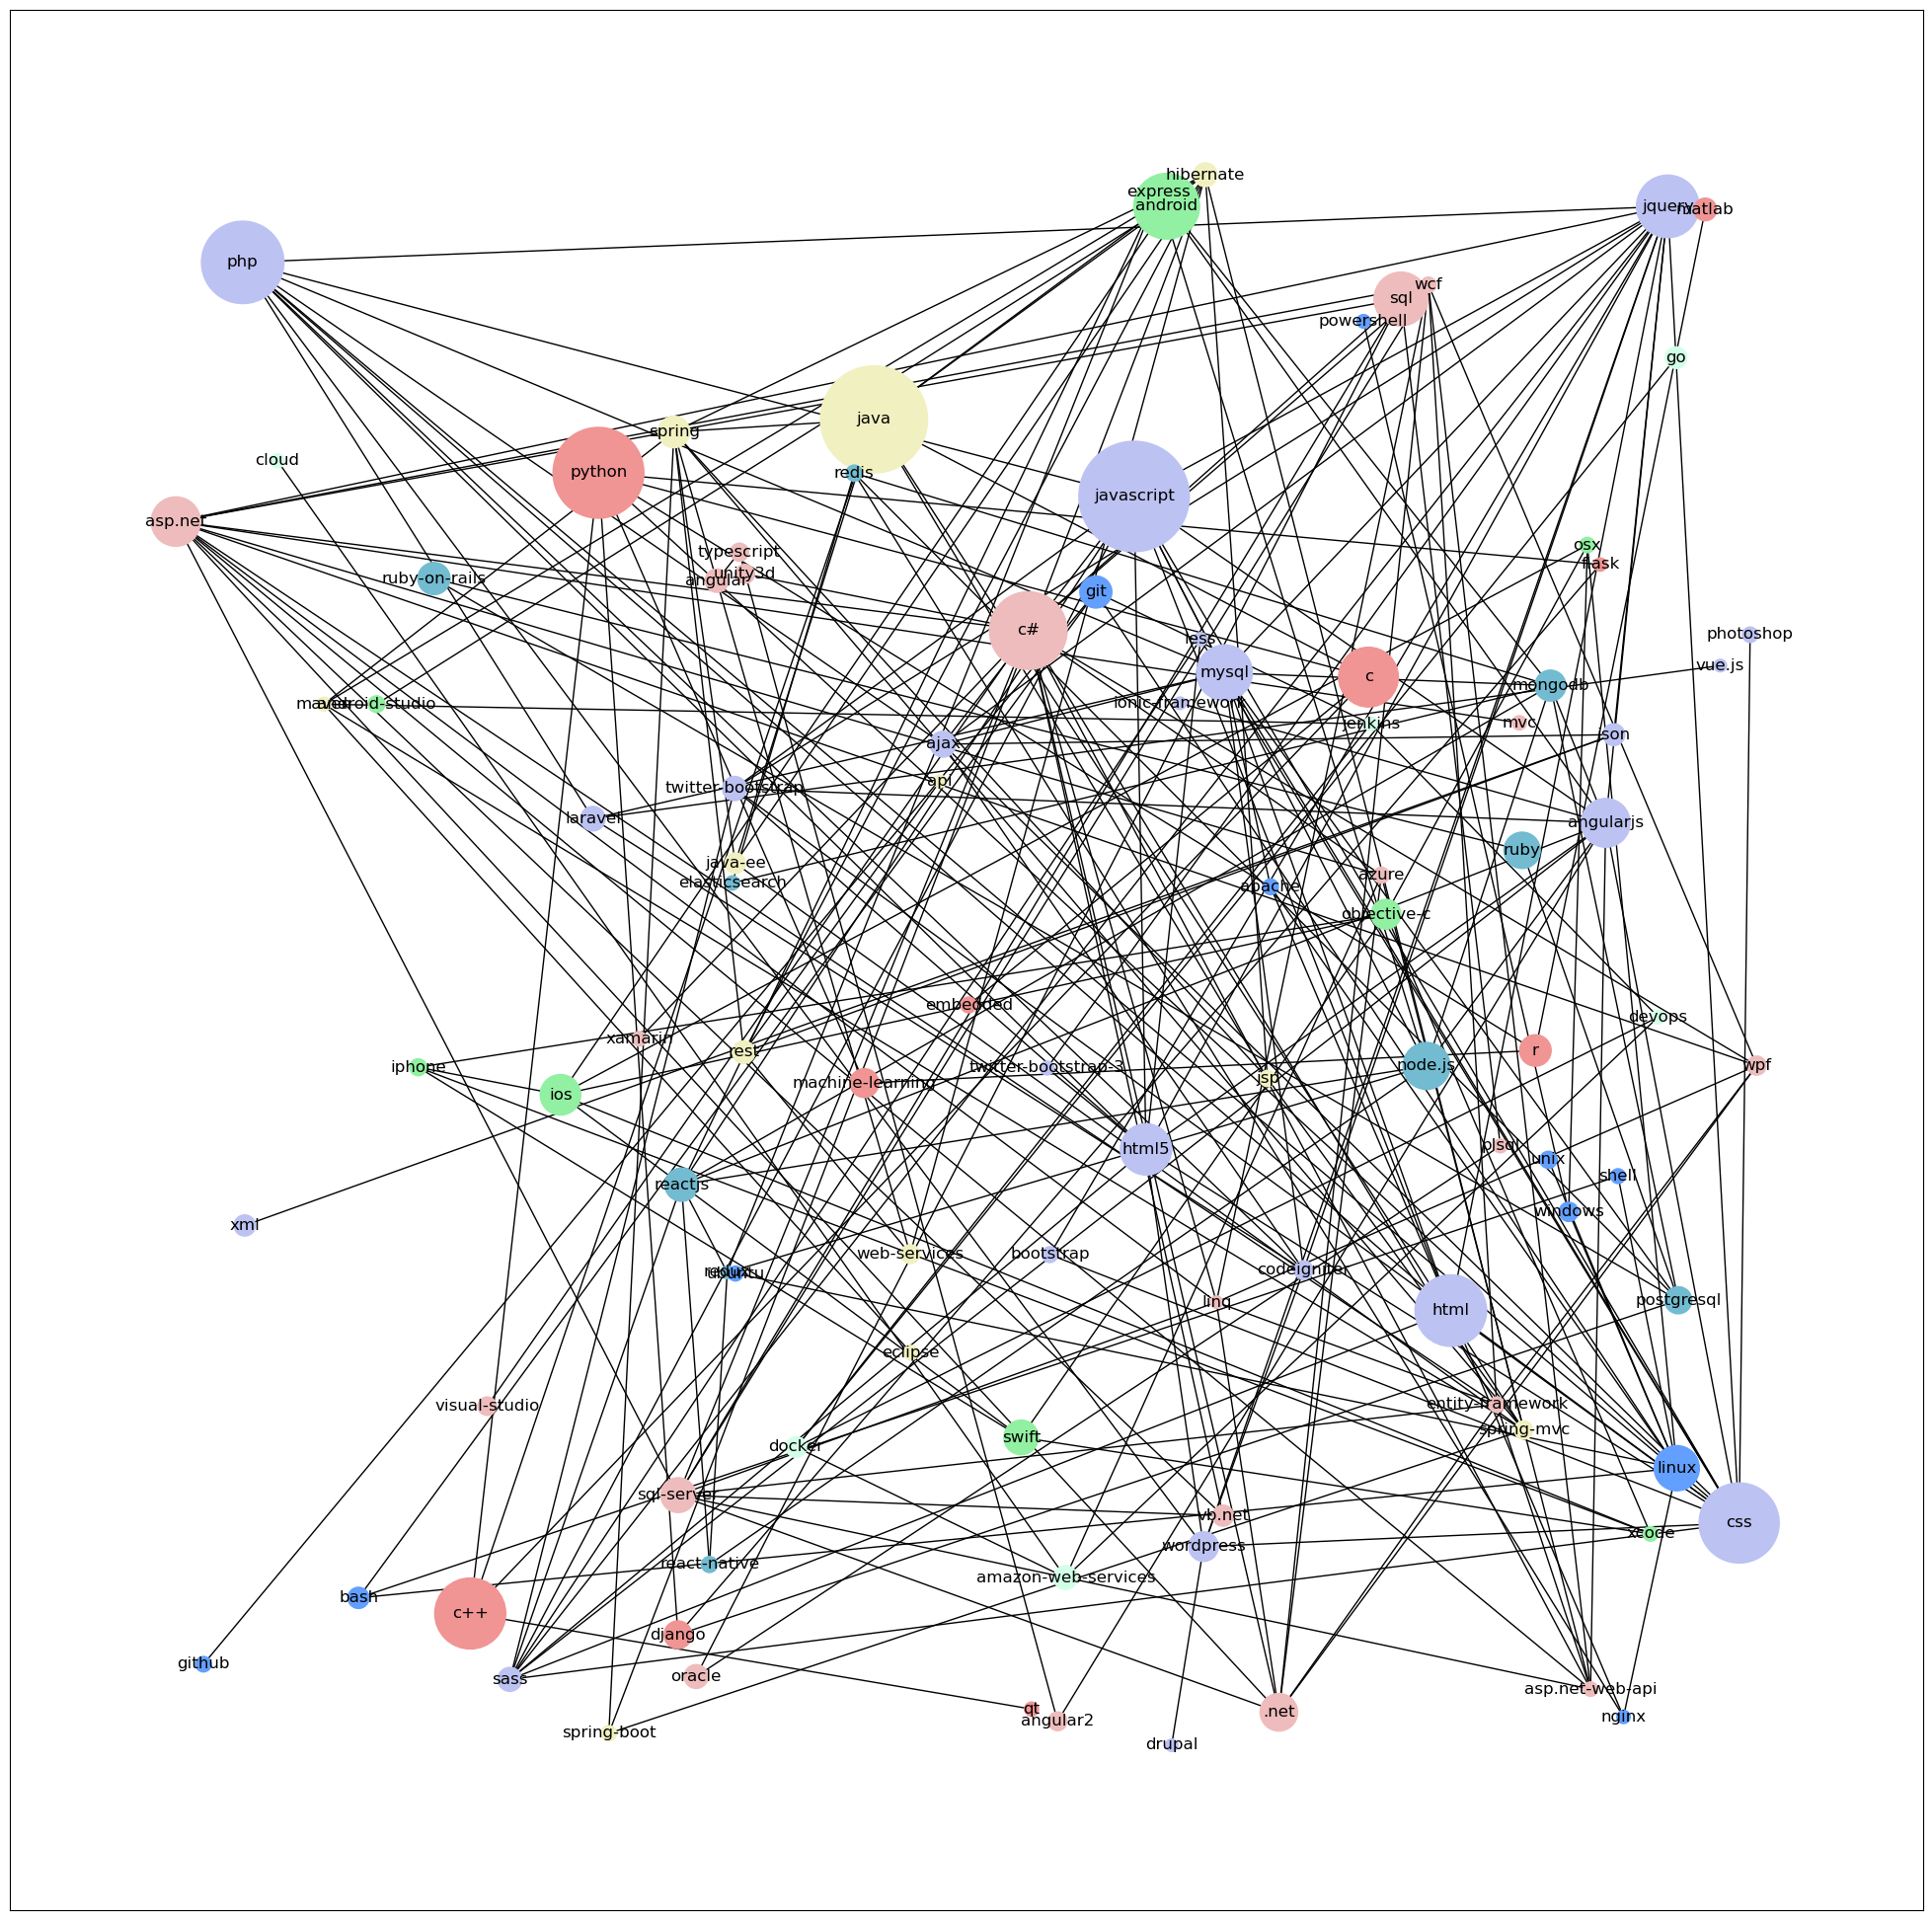

In [7]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
# On retient la composante connexe avec le plus grand nombre de sommet
g = S[0]
#   visualisation du graphe
plt.figure(figsize=(25,25))
colors1 = [color_map[g.nodes[node]['group']] for node in g]
sizes1 = [g.nodes[node]['nodesize']*10 for node in g]
nx.draw_networkx(g, pos=nx.random_layout(g), node_color = colors1, node_size = sizes1)

Dans cette représentation du graphe `g`, la taille du noeud est proportionnelle au poids du noeud. On peut donc remarquer que certains langages sortent particulièrement du lot. Des langages comme java, javascript, jquery ou encore python, qui selon toute vraisemblance seront la tête d'affiche des langages présent dans ce réseau 

* Statistique descriptive pour le nouveau graphe. Tout en prenant le soin de vérifier que ce dernier contient bien une seule composante connexe

In [8]:
print("Le graphe est un graphe orienté : ", nx.is_directed(g))
print("Le nombre de composante connexe : ", nx.number_connected_components(g))
print("Nombre de noeuds : ", g.number_of_nodes())
print("Le nombre de liens : ", g.number_of_edges())

Le graphe est un graphe orienté :  False
Le nombre de composante connexe :  1
Nombre de noeuds :  102
Le nombre de liens :  235


Ainsi, nous sommes en présence de graphe non orienté à une composante connexe et disposant de 102 sommets et 235 liens. Cela signifie qu'une arrête reliant deux langages A et B est équivalente à une arrête reliant les B et A. 

In [9]:
print("le dégrée moyen est de :", np.mean([d for _, d in g.degree()]))

le dégrée moyen est de : 4.607843137254902


Cela indique donc que les langages informatiques on beaucoup d'affinité avec quatre (04) autres langages informatiques en moyenne 

In [10]:
print("La densité du graphe G :", nx.density(g))
print("Le diamètre du graphe g est :", nx.diameter(g))

La densité du graphe G : 0.045622209279751504
Le diamètre du graphe g est : 10


Ainsi, la plus grande distance possible entre deux langage est de : 10

In [11]:
# Longueur des plus court chemin 
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(g))
#print(shortest_path_lengths)

# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes

texte1 = "La longueur moyenne des chaines de caractère est : " +  str(np.mean(average_path_lengths))+". " 
texte2 = "En d'autres termes, pour se connecter d'un noeud à n'imporque quel autre, il faudrait traverser au moins " + str(np.mean(average_path_lengths)).split(".")[0] + " arrêtes"

print(texte1 + texte2)

La longueur moyenne des chaines de caractère est : 4.463667820069205. En d'autres termes, pour se connecter d'un noeud à n'imporque quel autre, il faudrait traverser au moins 4 arrêtes


Le coefficient de clustering 

In [12]:
print("Le coefficient de clustering est", nx.average_clustering(g))

Le coefficient de clustering est 0.46661551955669606


Le coefficient de regroupement d'un nœud $v$ est défini comme la probabilité que deux amis de $v$ choisis au hasard soient amis entre eux. Par conséquent, le coefficient de clustering moyen est la moyenne des coefficients de clustering de tous les nœuds. Plus le coefficient de clustering moyen est proche de $1$, plus le graphe sera complet car il n'y a qu'une seule composante géante. Enfin, c'est un signe de fermeture triadique car plus le graphe est complet, plus il y aura de triangles.  

Cela signifie donc que pour un langage $v$ donné, deux langages aux hasards connecté à $v$ ont 46% de chance d'être connectés entre eux

## I.3. Distribution des dégrées
### I.3.1. Tableau des distributions de dégrée

In [13]:
degree = nx.degree_histogram(g)
degree_distribution = {}
for i in range(0, len(degree)):
    degree_distribution[i] = degree[i]
    
Tableau = {"Degree": list(degree_distribution.keys()),
           "Nombre" : list(degree_distribution.values())
}

Tableau = pd.DataFrame(Tableau)
Tableau

Degree  Nombre
0        0       0
1        1      22
2        2      12
3        3      13
4        4      16
5        5       6
6        6       7
7        7       6
8        8       6
9        9       4
10      10       3
11      11       1
12      12       1
13      13       2
14      14       2
15      15       0
16      16       1

### I.3.2. Histogramme des dégrées

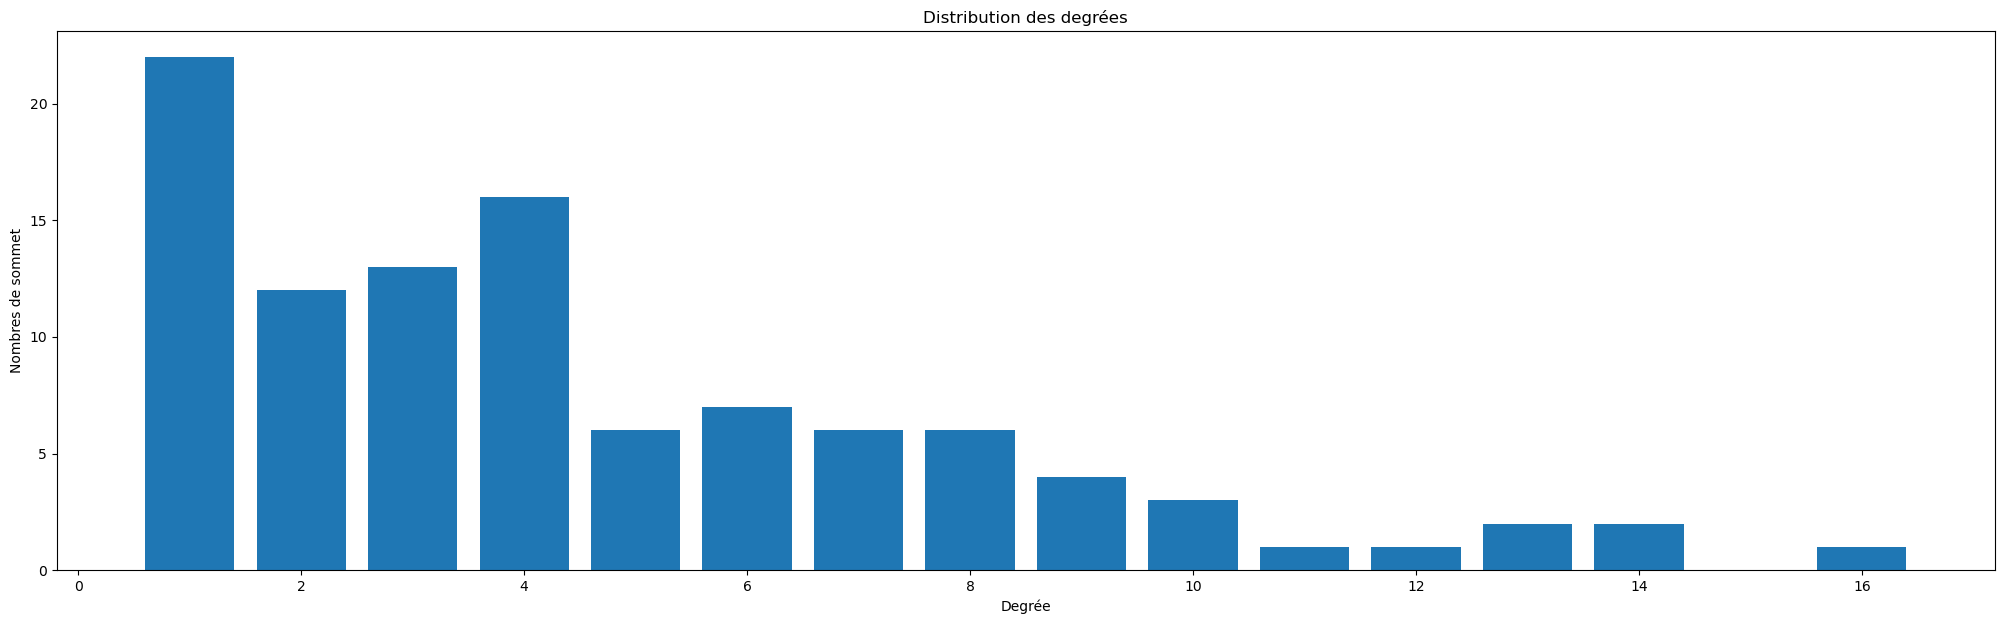

In [14]:
plt.figure(figsize=(25, 7))
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
dmax = max(degree_sequence)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degrée")
plt.ylabel("Nombres de sommet")
plt.title("Distribution des degrées")
plt.show()

**Commentaire** : On remarque qu'un certain nombre de sommet ont des dégrés assez élevés. Il serait important d'y jeter un coup d'oeil 

In [15]:
les_nodes = list(df_nodes["name"])
for noeud in les_nodes:
    if nx.degree(g, str(noeud)) in list(range(11, 20)):
        print(noeud," : ", nx.degree(g, str(noeud)))

css  :  14
asp.net  :  13
c#  :  14
javascript  :  12
jquery  :  16
mysql  :  11
angularjs  :  13


Dans le but de personnaliser le présent projet, il serait intéressant de regarder le dégré des logiciels/language que nous maitrisons le plus à savoir : r, python, sql...

In [16]:
print("python : ", nx.degree(g, "python"))
print("r : ", nx.degree(g, "r"))
print("mysql : ", nx.degree(g, "mysql"))

python :  7
r :  3
mysql :  11


**Commentaire :**  On remarque que le language avec le plus grand nombre de liaison est jquery. Alors, pour ceux qui ne connaissent pas jquery, c'est une bibliothèque JavaScript gratuite, libre et multiplateforme compatible avec l'ensemble des navigateurs Web (Internet Explorer, Safari, Chrome, Firefox, etc.), elle a été conçue et développée en 2006 pour faciliter l'écriture de scripts. Il s'agit du framework JavaScript le plus connu et le plus utilisé. Il permet d'agir sur les codes HTML, CSS, JavaScript et AJAX et s'exécute essentiellement côté client. On remarque donc son importance. MYSQL, le language qu'on apprend depuis un certains nombre d'année n'est pas en laisse en matière de relation, contrairement à "r" qui n'en a que trois (03)

# II. Analyse des centralités 
##  II-1. Centralité de dégré
### II-1.1. Calcul des centralités de dégré
Concepte très simple, un noeud de dégré très grand est très important. Ainsi, le dégré de centralité de i est nombre de voisin que possède le noeud, soit : $C_{d}(i) = di$

La centralité de degré attribue un score d'importance basé simplement sur le nombre de liens détenus par chaque nœud. Dans cette analyse, cela signifie que plus le degré de centralité d'un nœud est élevé, plus les arêtes sont connectées à ce nœud particulier et donc plus ce nœud a de nœuds voisins. En fait, le degré de centralité d'un nœud est la fraction des nœuds auxquels il est connecté. En d'autres termes, c'est le pourcentage du réseau auquel le nœud particulier est connecté, c'est-à-dire avec lequel il est ami.

Dans le but, de comprendre les éventuelles difference entre les differentes normalisations possible, les calculs sont faits à la main pour chaque normalisation possible. Pour rappel : 
-   $C^{norm}_{d} = \frac{d_{i}}{n-1}$
-   $C^{max}_{d} = \frac{d_{i}}{max_{j}d_{j}}$
-   $C^{sum}_{d} = \frac{d_{i}}{\sum_{j} d_{j}} = \frac{d_{i}}{2m}$

In [17]:
les_sommets = list(g.nodes)    
Mon_tableau = pd.DataFrame(nx.degree(g, les_sommets))
Mon_tableau.columns = ["Language", "Degree"]
Mon_tableau["Cnorm"] = Mon_tableau["Degree"]/int(np.shape(Mon_tableau)[0])
Mon_tableau["Cmax"] = Mon_tableau["Degree"]/int(np.max(Mon_tableau["Degree"]))
Mon_tableau["Csum"] = Mon_tableau["Degree"]/int(np.sum(Mon_tableau["Degree"]))
Mon_tableau = Mon_tableau.sort_values("Cnorm", ascending = False)

Ainsi, nous pouvons représenté l'histogramme du degrée de centralité par nous même...


Text(0.5, 1.0, 'Histogramme du dégrée de centralité ')

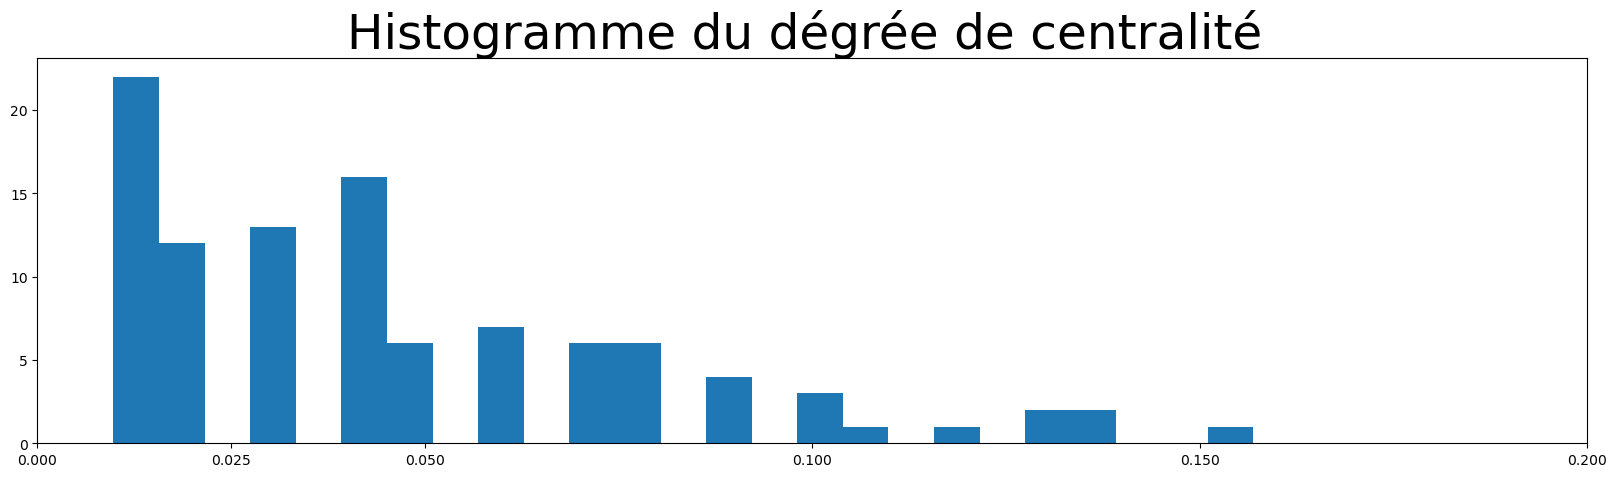

In [18]:
print("Ainsi, nous pouvons représenté l'histogramme du degrée de centralité par nous même...")
plt.figure(figsize= (20, 5))
plt.hist(Mon_tableau["Cnorm"], bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])
plt.title("Histogramme du dégrée de centralité ", fontdict={"size": 35}, loc="center")

La fonction degree_centrality contenue dans networkx nous renvoi la normalisation de la centralité de dégré par le dégrée maximum possible. $C^{norm}_{d} = \frac{d_{i}}{n-1}$

### II-1.2. Histogramme des centralités de dégré (normalisé par le dégrée maximum possible) : Fonction degree_centrality
L'histogramme de dégrée de centralité réalisté ci-dessous est implémenté dans la fonction degree_centrality contenue dans nx.centrality qui permet d'avoir le même résultat. Les calculs précédents ont permis de bien comprendre les étapes sous jacentes.

Text(0, 0.5, 'Counts')

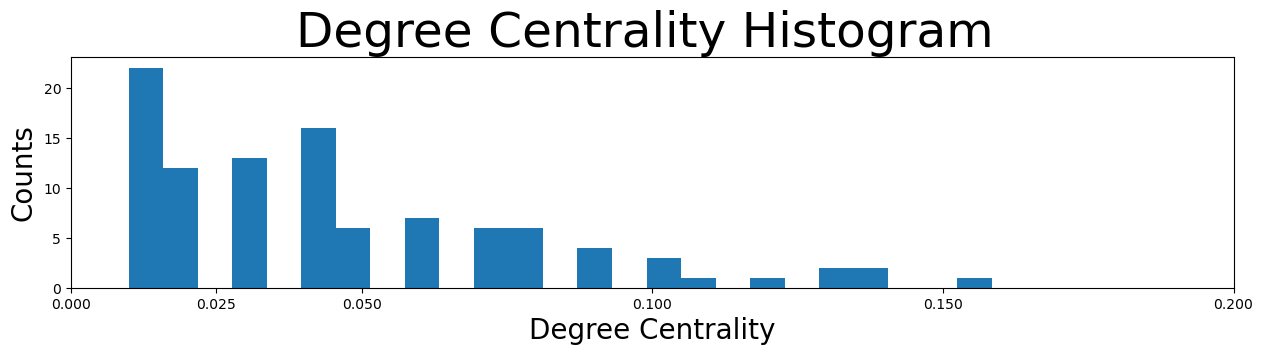

In [19]:
degree_centrality = nx.centrality.degree_centrality(g)  # save results in a variable to use again
plt.figure(figsize=(15,3))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [20]:
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[('jquery', 0.15841584158415842),
 ('css', 0.13861386138613863),
 ('c#', 0.13861386138613863),
 ('asp.net', 0.12871287128712872),
 ('angularjs', 0.12871287128712872)]

**Commentaire :** La notion de centralité de dégrée est basée sur le dégrée d'un sommet, plus ce dernier est grand, plus le langage est important et facilite la maitrise d'autres logiciels. Ainsi, jquery, css, angularjs et asp.net sont les plus important selon la centralité de dégrée, le dernier étant matlab. Ainsi la maitrise desdits langages, facilite énormément la maitrise d'autres langages qui y sont connectés. 

Dans le but de comparé les résultats entre eux, on conserve les résultats dans un dataframe appelé `Mydata`. 

In [21]:
Mydata = pd.DataFrame(list(degree_centrality.items()),columns = ["Language","Degree_centrality"])

## II-2. Dégré de proximité
Centralité de proximité

La centralité de proximité note chaque nœud en fonction de sa "proximité" avec tous les autres nœuds du réseau. Pour un nœud $v$, sa centralité de proximité mesure la distance moyenne avec tous les autres nœuds. En d'autres termes, plus la centralité de proximité de $v$ est élevée, plus il est situé près du centre du réseau. Il est calculé par : 

$Cc(i) = \frac{1}{\sum_{j \ne i} l_{ij}}$ avec $l_{ij}$ le plus court chemin entre $i$ et $j$ et peut être normalisé en multipliant par $(n-1)$

La mesure de la centralité de proximité est très importante pour le suivi de la diffusion de fausses informations.

Text(0, 0.5, 'Counts')

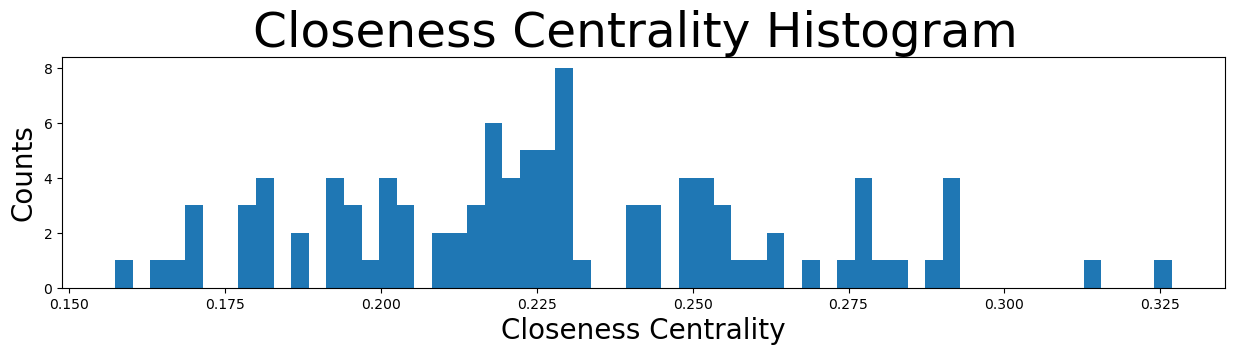

In [22]:
closeness_centrality = nx.centrality.closeness_centrality(g)
plt.figure(figsize=(15, 3))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

On peut en avoir une représentation graphique

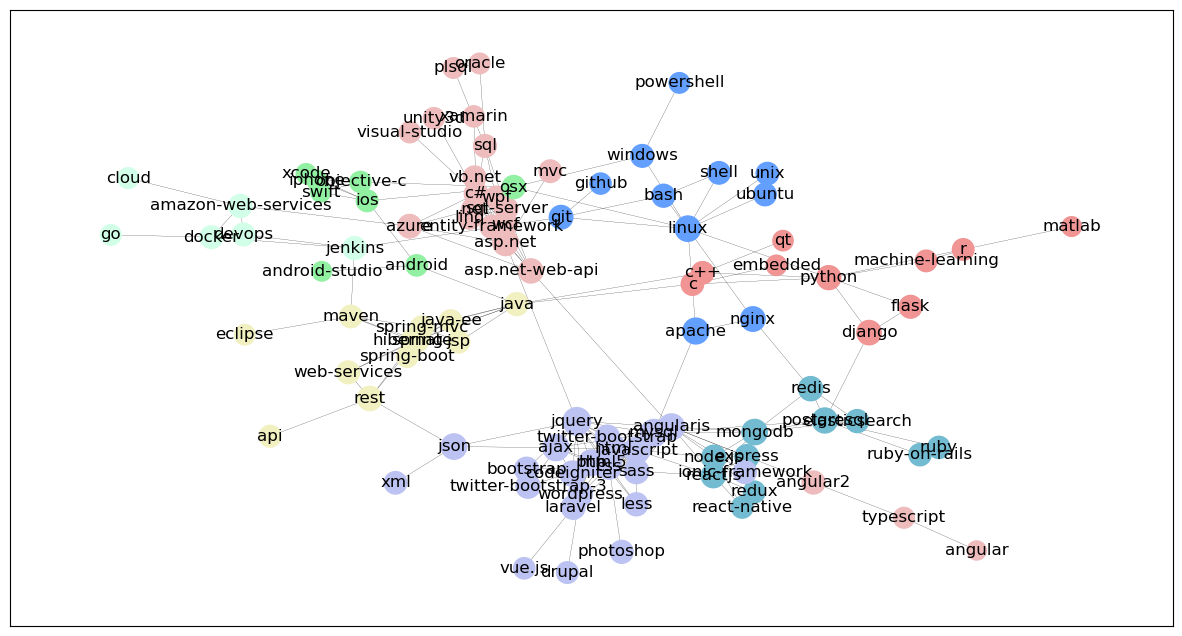

In [23]:
node_size = [v * 1200 for v in closeness_centrality.values()] 
colors3 = [color_map[g.nodes[node]['group']] for node in g]
plt.figure(figsize=(15, 8))
nx.draw_networkx(g, pos=nx.spring_layout(g), node_size=node_size, with_labels=True, width=0.15, node_color = colors3)

In [24]:
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[('jquery', 0.3268608414239482),
 ('mysql', 0.3136645962732919),
 ('ajax', 0.29190751445086704),
 ('css', 0.2910662824207493),
 ('javascript', 0.29022988505747127)]

**Commentaire :** Basée sur la centralité de la proximité, les langages les plus important sont successivement jquery, mysql, ajax, css et javascript. En ce qui concerne les cinq derniers, il s'agit d'angular, d'android-studio, de matlab, d'xcode et de swift. Il est important de remarquer la différence entre les résultats obtenus par le closness_centrality et le dégré centrality. Ainsi, les langages pouvant facilement interagir avec d'autres langages (plus proche du centre), sont les cinq premiers cités plus haut (et qui ne sont pas les cinq ayant les plus grand dégrés.)

In [25]:
df1 = pd.DataFrame(list(closeness_centrality.items()),columns = ["Language", "closeness_centrality"]).sort_values("closeness_centrality", ascending = False)
df1

Language  closeness_centrality
15           jquery              0.326861
19            mysql              0.313665
39             ajax              0.291908
1               css              0.291066
14       javascript              0.290230
..              ...                   ...
7             swift              0.169179
42            xcode              0.169179
101          matlab              0.167219
65   android-studio              0.164228
70          angular              0.157321

[102 rows x 2 columns]

Toujours dans le but de la comparaison des différents résultats, on fusionne le tableadu df1 à Mydata

In [26]:
Mydata = Mydata.merge(df1, on= "Language")

## II-3. Centralité d'intermédiarité

Il représente à quel point un noeud est bien situé par rapport aux liens des autres noeuds.

La centralité d'intermédiarité mesure le nombre de fois où un nœud se trouve sur le chemin le plus court entre d'autres nœuds, ce qui signifie qu'il agit comme un pont. En détail, la centralité d'entre-deux d'un nœud $v$ est le pourcentage de tous les chemins les plus courts de deux nœuds quelconques (à part $v$), qui passent par $v$. 

Il est calculé par : $C_{B}(i) = \sum_{j \ne i, k \ne i, j \ne k} \frac{g_{jk}(i)}{g_{jk}}$ avec
-   $g_{jk}$ le nombre de plus courts chemins entre j et k ;
-   $g_{jk}(i)$ le nombre de plus courts chemins entre j et k qui passent par i.

Un sommet avec une centralité d'interêt élevée agit comme un pont vers de nombreux sommets qui ne sont pas connecté et a donc la capacité de les influencer en leur transmettant des informations. 

Text(0, 0.5, 'Counts')

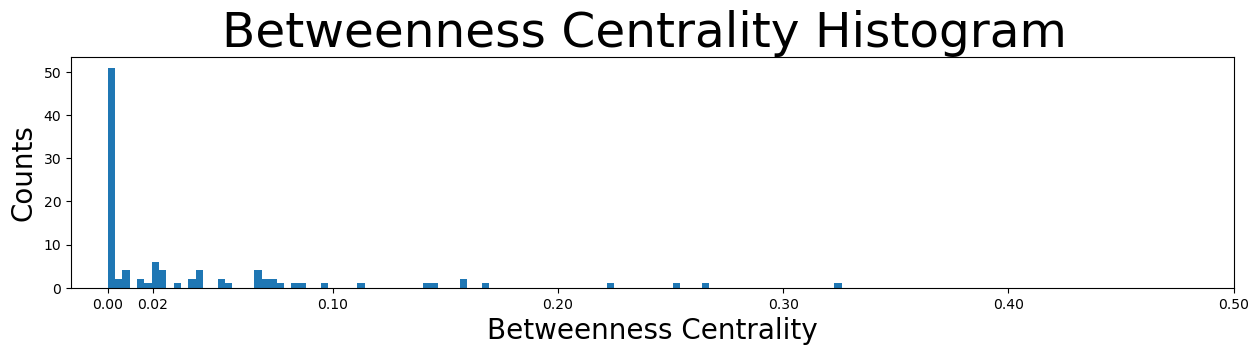

In [27]:
betweenness_centrality = nx.centrality.betweenness_centrality(g)
plt.figure(figsize=(15, 3))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [28]:
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[('jquery', 0.3259273230102584),
 ('linux', 0.2658049033474776),
 ('mysql', 0.25214684446466634),
 ('asp.net', 0.2220128598186257),
 ('apache', 0.16691993155359494)]

**Commentaire :** On remarque plusieurs langage ont des centralités d'intérêt nul. Ces derniers n'agissent donc pas comme des ponts. Cependant, d'autres ont également des centralités d'intérêt extrêmement élevées comme jquery (0.325927), linux(0.265805) ou encore mysql(0.252147). Ces langages sont donc les plus importants qui servent de pont pour passer d'un langage à un autre.

In [29]:
df2 = pd.DataFrame(list(betweenness_centrality.items()),columns = ["Language", "betweenness_centrality"]).sort_values("betweenness_centrality", ascending = False)
df2

Language  betweenness_centrality
15             jquery                0.325927
58              linux                0.265805
19              mysql                0.252147
11            asp.net                0.222013
43             apache                0.166920
..                ...                     ...
65     android-studio                0.000000
70            angular                0.000000
72   machine-learning                0.000000
73                 qt                0.000000
101            matlab                0.000000

[102 rows x 2 columns]

Nous pouvons également obtenir une image des nœuds présentant les plus fortes centralités d'interdépendance et de leur emplacement dans le réseau.

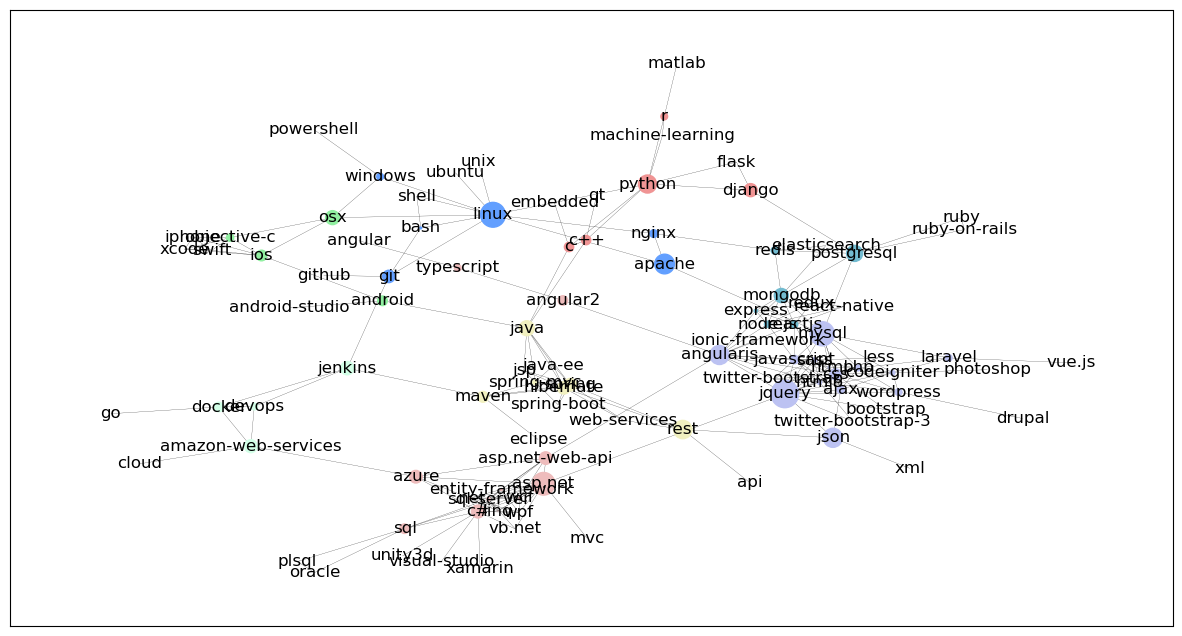

In [30]:
node_size = [v * 1200 for v in betweenness_centrality.values()] 
colors3 = [color_map[g.nodes[node]['group']] for node in g]
plt.figure(figsize=(15, 8))
nx.draw_networkx(g, pos=nx.spring_layout(g), node_size=node_size, with_labels=True, width=0.15, node_color = colors3)

En ce basant sur le présent graphique, il est clair que ces langages ayant de très grande centralité d'intermédiarité sont des ponts qui relient des groupes de langage à d'autre. On peut assez facilement remarquer cette caractéristique avec le présent graphique, notamment avec linux, jquery ou encore mysql.

In [31]:
Mydata = Mydata.merge(df2, on= "Language")

## II-4. Centralité de vecteur propre ou centralité spectrale

La centralité des vecteurs propres est la métrique qui montre à quel point un nœud est connecté à d'autres nœuds importants du réseau. Elle mesure l'influence d'un nœud en fonction de son degré de connexion à l'intérieur du réseau et du nombre de liens qu'il possède, etc... Cette mesure permet d'identifier les nœuds ayant le plus d'influence sur l'ensemble du réseau. Une centralité de vecteur propre élevée signifie que le nœud est connecté à d'autres nœuds qui ont eux-mêmes une centralité de vecteur propre élevée.

Elle correspond à : $C(v) = \frac{1}{\lambda} \sum_{u \ne v} A(v, u)C(u)$ qui peut s'écrire $\lambda C = AC$

Text(0, 0.5, 'Counts')

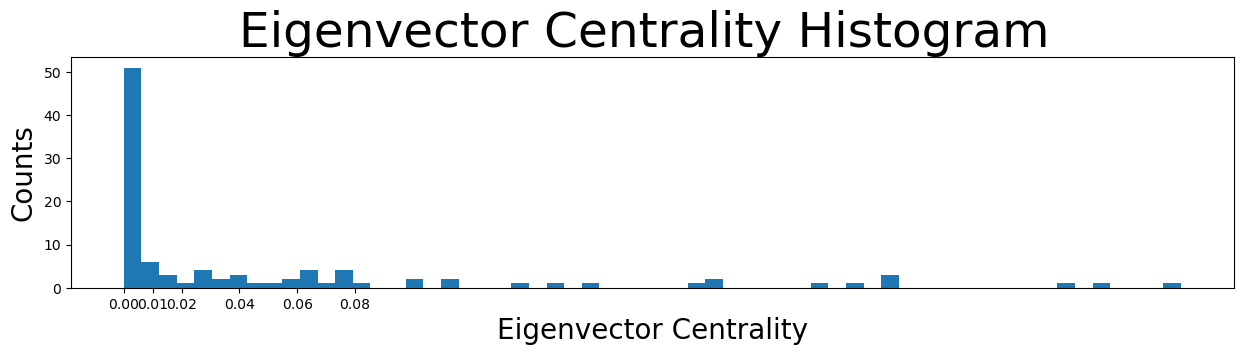

In [32]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(g)
plt.figure(figsize=(15, 3))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [33]:
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[('jquery', 0.36576487407872865),
 ('css', 0.3387030312023421),
 ('javascript', 0.3256327557015085),
 ('html5', 0.26810668391552056),
 ('php', 0.26530252590274106)]

**Commentaire :** Jquery est le langage avec la centralité de vecteur propre le plus élevée avec 0,36. Ce noeud est également un `noeud phare` et peut certainement être considéré comme le langage le plus important de notre réseau en termes d'influence globale sur l'ensemble du réseau.

Il possède également des centralités de degré et des centralités d'interdépendance parmi les plus élevées, ce qui rend sa matrise très populaire et influent pour la maitrise d'autres langage. 

On peut en avoir, un aspect visuel

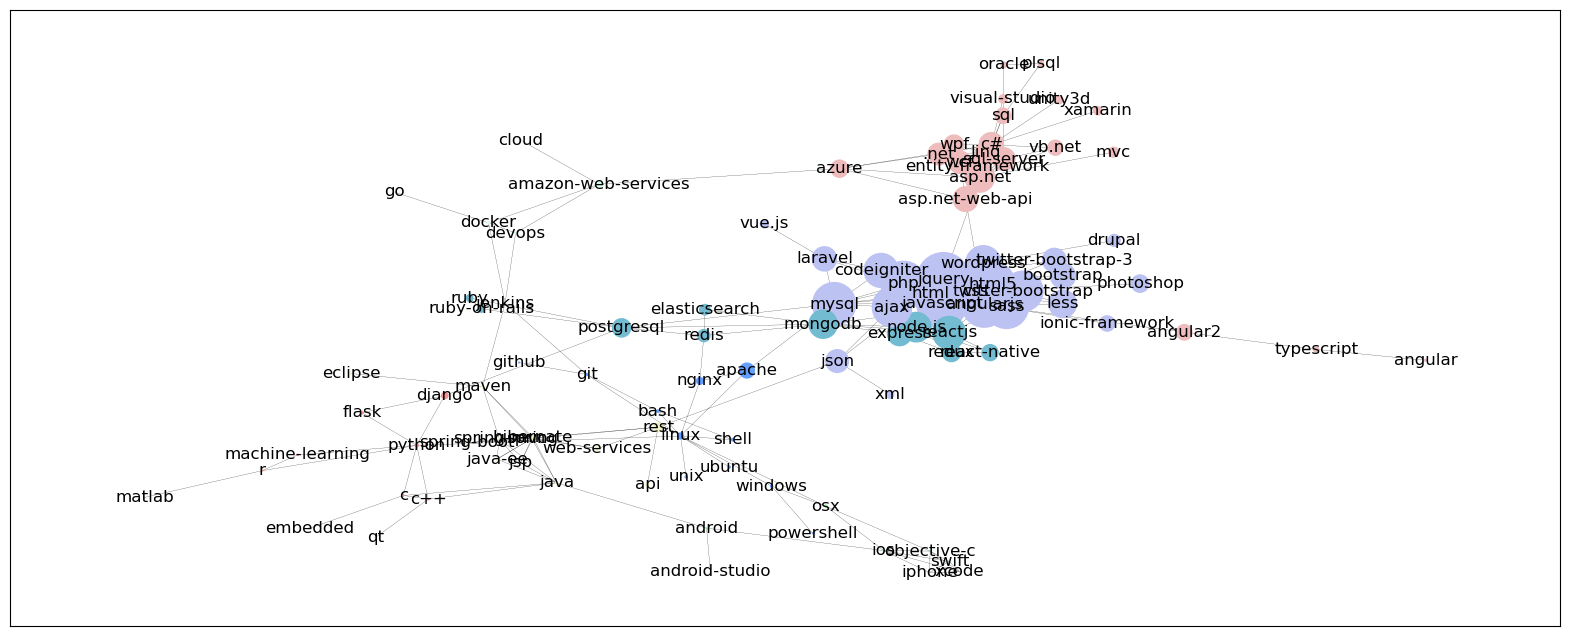

In [34]:
node_size = [v * 4000 for v in eigenvector_centrality.values()]  
plt.figure(figsize=(20, 8))
nx.draw_networkx(g, pos=nx.spring_layout(g), node_size=node_size, with_labels=True, width=0.15, node_color = colors3)

In [35]:
df3 = pd.DataFrame(list(eigenvector_centrality.items()),columns = ["Language", "eigenvector_centrality"]).sort_values("eigenvector_centrality", ascending = False)
df3

Language  eigenvector_centrality
15           jquery                0.365765
1               css                0.338703
14       javascript                0.325633
8             html5                0.268107
18              php                0.265303
..              ...                     ...
7             swift                0.000028
30           iphone                0.000028
42            xcode                0.000028
101          matlab                0.000019
65   android-studio                0.000010

[102 rows x 2 columns]

In [36]:
Mydata = Mydata.merge(df3, on= "Language")
Mydata.sort_values(by = ["Degree_centrality", "closeness_centrality", "betweenness_centrality"], ascending= False)

Language  Degree_centrality  closeness_centrality  \
15           jquery           0.158416              0.326861   
1               css           0.138614              0.291066   
12               c#           0.138614              0.239336   
45        angularjs           0.128713              0.290230   
11          asp.net           0.128713              0.278237   
..              ...                ...                   ...   
73               qt           0.009901              0.178131   
80         embedded           0.009901              0.178131   
101          matlab           0.009901              0.167219   
65   android-studio           0.009901              0.164228   
70          angular           0.009901              0.157321   

     betweenness_centrality  eigenvector_centrality  
15                 0.325927                0.365765  
1                  0.052721                0.338703  
12                 0.071114                0.077280  
45                 0.156711                0.265203  
11                 0.222013                0.113346  
..                      ...                     ...  
73                 0.000000                0.000029  
80                 0.000000                0.000029  
101                0.000000                0.000019  
65                 0.000000                0.000010  
70                 0.000000                0.000404  

[102 rows x 5 columns]

## Comparaison des statistiques

# III. Détection des communautes

## III-1. Algorithme de Givan Newman

Une communauté est un groupe de nœuds, de sorte que les nœuds à l'intérieur du groupe sont connectés avec beaucoup plus d'arêtes qu'entre les groupes. 

In [37]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(g)
next_level_communities = next(communities_generator)
print("Nous avons", len(list(next_level_communities)), "communautés")
#sorted(map(sorted, next_level_communities))

Nous avons 2 communautés


In [38]:
for i in range(len(list(next_level_communities))):
    print("Communauté", str(i+1))
    print(list(next_level_communities)[i])

Communauté 1
{'json', 'maven', 'docker', 'windows', 'less', 'api', 'codeigniter', 'ios', 'css', 'matlab', 'javascript', 'elasticsearch', 'qt', 'laravel', 'hibernate', 'c', 'drupal', 'swift', 'jenkins', 'bootstrap', 'go', 'ruby-on-rails', 'osx', 'spring', 'python', 'flask', 'reactjs', 'sass', 'ajax', 'ruby', 'rest', 'iphone', 'postgresql', 'django', 'web-services', 'github', 'devops', 'jsp', 'angular2', 'spring-boot', 'express', 'vue.js', 'ionic-framework', 'angularjs', 'react-native', 'mongodb', 'xcode', 'android', 'eclipse', 'android-studio', 'html5', 'bash', 'jquery', 'r', 'twitter-bootstrap', 'nginx', 'amazon-web-services', 'typescript', 'objective-c', 'php', 'node.js', 'unix', 'machine-learning', 'java-ee', 'shell', 'git', 'apache', 'redux', 'ubuntu', 'cloud', 'angular', 'spring-mvc', 'twitter-bootstrap-3', 'xml', 'mysql', 'redis', 'photoshop', 'c++', 'powershell', 'wordpress', 'linux', 'java', 'embedded', 'html'}
Communauté 2
{'wpf', 'asp.net-web-api', 'sql-server', 'linq', 'c#', 

* Représentation des communatés

In [39]:
%matplotlib inline
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)

Les fonctions pour les représentations

L'idée est d'avoir la représentation la plus explicite possible de notre graphe. Ce que permet de faire ces trois fonctions.

In [40]:
 
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

Ici, on a défini des couleurs pour les noeuds, les liens à l'intérieur des communautés et en dehors. Ces fonctions proviennent de recherche internet et ont été adapté à notre situation.

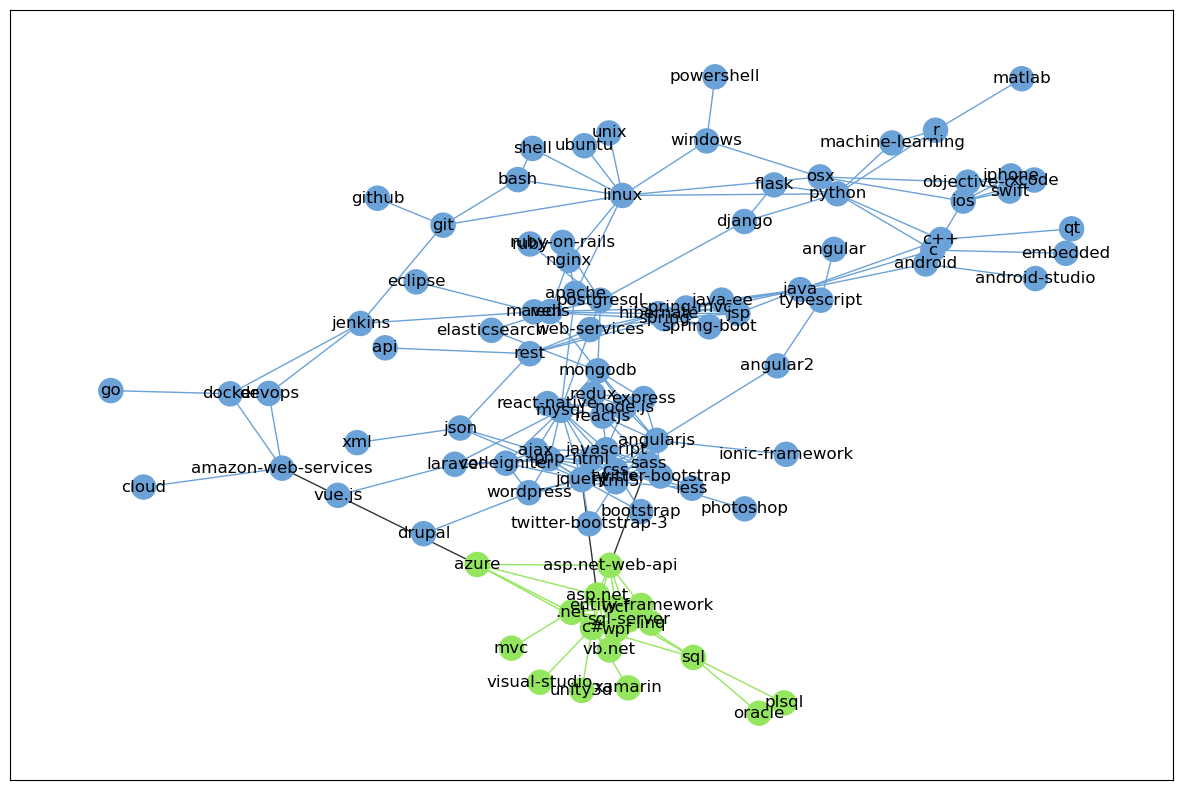

In [41]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

# Set node and edge communities
set_node_community(g, next_level_communities)
set_edge_community(g)

#Définir la couleur des noeuds
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

#Définir la couleur communautaire pour les bords internes
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]
position = nx.spring_layout(g)
# Draw external edges
nx.draw_networkx(
    g, pos=position, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
    # Draw nodes and internal edges
nx.draw_networkx(
    g, pos=position, node_color=node_color,
    edgelist=internal, edge_color=internal_color)
plt.show()

L'algorithme de Givan Newmann indique la présence de deux communautés différentes au seins de notre graphe. D'un coté on trouve les langages 'mvc', 'azure', 'c#', 'unity3d', 'oracle', 'sql', 'asp.net', 'wcf', 'vb.net', 'asp.net-web-api', 'visual-studio', 'xamarin', 'wpf', 'linq', 'entity-framework', '.net', 'sql-server', 'plsql' qui ont tous un lien avec le développement de logiciels. Plus spécifiquement, ils sont tous liés à l'environnement .Net de microsoft. 

La deuxième communauté quant à elle, est constituée de langages de programmation (java, c++, python...), de frameworks de développement web (Django, AngularJS, Flask...), de technologie de contenu (WordPress), de gestion de base de données (MySQL, PostgreSQL, MongoDB et elasticsearch), ou encore des apprentissages liées à l'apprentissage automatique (Tensorflow, Pytorch, scikit-learn). Il est également important de remarquer que ces langages n'ont pas de lien particulier entre eux.

On peut donc conclure que l'algorithme de détection de communauté de Givan-Newmann oppose les langages liés à l'environnement .Net de microsoft aux autres langages.

## III-2. Algorithme de Clauset-Newmann

In [42]:
communities_clauset = community.greedy_modularity_communities(g)
print("Nous détectons la présence de ", len(communities_clauset), "communautés")

Nous détectons la présence de  9 communautés


In [43]:
for i in range(len(communities_clauset)):
    print("Communauté", str(i+1), ":")
    print(list(communities_clauset)[i]) 

Communauté 1 :
frozenset({'twitter-bootstrap', 'react-native', 'json', 'reactjs', 'less', 'sass', 'angularjs', 'xml', 'php', 'drupal', 'node.js', 'photoshop', 'html5', 'express', 'codeigniter', 'ajax', 'wordpress', 'css', 'ionic-framework', 'redux', 'jquery', 'javascript', 'bootstrap', 'html', 'twitter-bootstrap-3'})
Communauté 2 :
frozenset({'wpf', 'linq', 'entity-framework', 'vb.net', 'visual-studio', 'sql', 'asp.net', 'asp.net-web-api', 'sql-server', 'c#', 'mvc', 'wcf', 'plsql', 'azure', 'unity3d', 'xamarin', '.net', 'oracle'})
Communauté 3 :
frozenset({'hibernate', 'rest', 'web-services', 'maven', 'java', 'api', 'eclipse', 'spring', 'spring-boot', 'spring-mvc', 'java-ee', 'jsp'})
Communauté 4 :
frozenset({'ios', 'swift', 'windows', 'iphone', 'xcode', 'objective-c', 'android', 'osx', 'android-studio', 'powershell'})
Communauté 5 :
frozenset({'python', 'flask', 'matlab', 'c', 'qt', 'django', 'embedded', 'r', 'c++', 'machine-learning'})
Communauté 6 :
frozenset({'ruby', 'mongodb', 'po

Contrairement à l'algorithme de Givan Newman, l'algorithme de détection de communauté de Clauset-Newmann identifie neuf (09) différentes communautés. 

On peut identifier la communauté n°9 constitué de 'typescript', 'angular', 'angular2', qui sont tous les trois des langages dévéloppés et maintenus par Microsoft, qui utilisent tous les concepts de programmation orientée objet et sont utilisés pour le développement d'application web à grande échelle. 

La communauté n°5 quant à elle, est composée de 'c', 'embedded', 'python', 'machine-learning', 'matlab', 'qt', 'r', 'django', 'c++', 'flask'. On peut d'ores et déjà remarquer les affinités entre `python, r, machine-learning, ou encore matlab`. Il est aussi important de remarquer que la plupart des autres langages dans cette communautés (flask, django, qt) sont des framework open-source de python encore `c`. Ainsi cette communauté est constitué de langage de calcul scientifique et des langages utilisés pour le développement des systèmes embarqués et des logiciels systèmes.  

La communauté n°6 regroupe les systèmes de gestion de base de données (MongoDB, Elasticsearch, PostgreSQL, MySQL) ou encore des systèmes de stockage de données en mémoire utilisé pour les bases de données (Redis). Les autres langages sont pour la plupart des framework de développement d'interface utilisateur ou d'application web. On peut en conclure que cette communauté regroupe les outils de gestion de base de données et des outils de concpetion d'interfaces pour y accéder. 

On peut aussi remarquer que la communauté n° 8 est composé des outils de `cloud computing`. Pour rappel, le `cloud computing` est une architecture informatique qui permet d'accéder à des ressources informatiques via une connexion internet. On peut aisément reconnaitre 'cloud', 'go' ou encore AWS(Amazon-Web-Service). Jenkins est un outil open source pour la mise en œuvre de la livraison continue et DevOps une pratique qui vise à améliorer la collaboration entre les développeurs et les opérateurs pour accélérer les cycles de développement et de mise en production. 

On peut aussi remarquer que la communauté n°4 composé de langage liés à l'informatique et à la technologie mobile. 

Pour conclure, on peut conclure que l'algorithme de détection de communauté de Clauset-Newann permet d'identifié des communautés ayant plus d'affinité à l'intérieur de la communauté et beaucoup moins d'affinité avec les langages en dehors de la communauté. Elle donne pour notre graphe, des résultats beaucoup plus précis. 

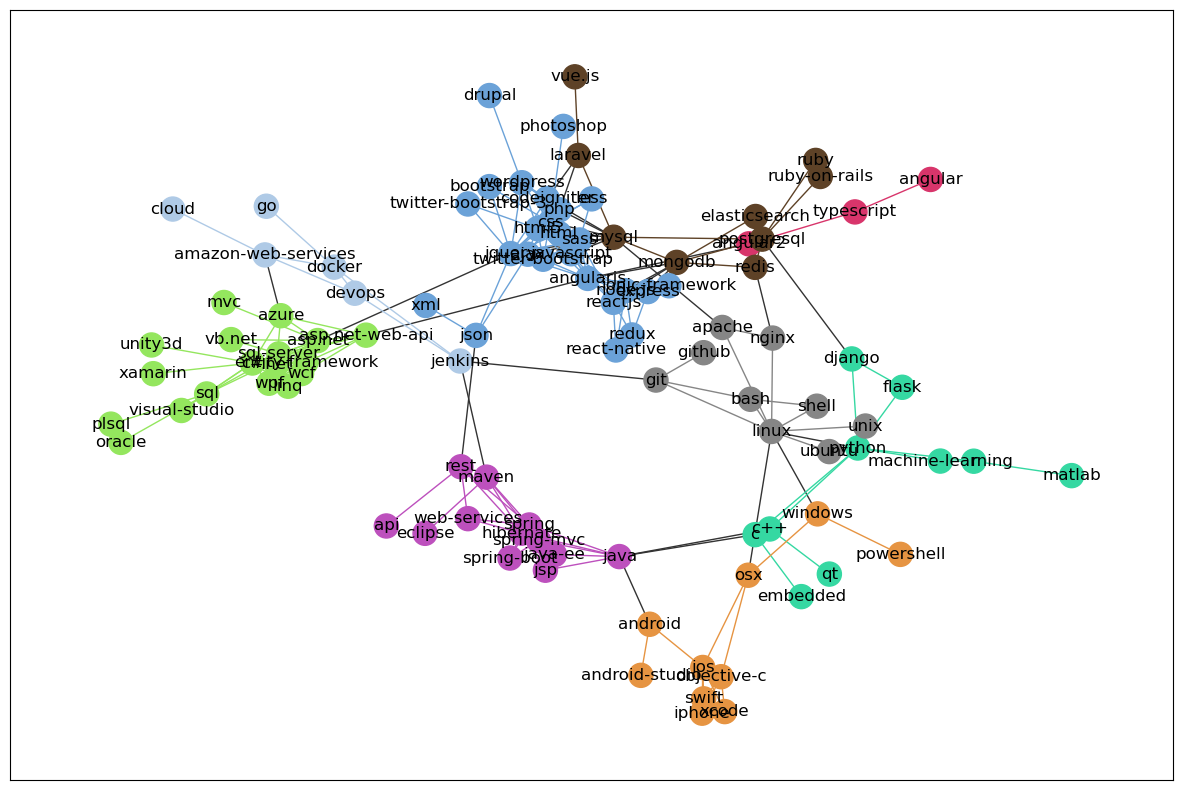

In [44]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(g, communities_clauset)
set_edge_community(g)
#Set community color for nodes
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]
# Set community color for internal edges
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]
position = nx.spring_layout(g)
# Draw external edges

nx.draw_networkx(
    g, pos=position, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)

nx.draw_networkx(
    g, pos=position, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

plt.show()

-   Avec l'algorithme naive de clauset, a-t-on le même résultat ?

On cherche à vérifier si l'algorithme naive de clauset donne le même résultat que l'algorithme de Clauset-Newmann

In [45]:
communities_clauset_naive = community.naive_greedy_modularity_communities(g)
print("Nous détectons la présence de ", len(communities_clauset_naive), "communautés")

for i in range(len(communities_clauset_naive)):
    print("Communauté", str(i+1), ":")
    print(list(communities_clauset_naive)[i]) 

Nous détectons la présence de  9 communautés
Communauté 1 :
frozenset({'twitter-bootstrap', 'react-native', 'json', 'reactjs', 'less', 'sass', 'angularjs', 'xml', 'php', 'drupal', 'node.js', 'photoshop', 'html5', 'express', 'codeigniter', 'ajax', 'wordpress', 'css', 'ionic-framework', 'redux', 'jquery', 'javascript', 'bootstrap', 'html', 'twitter-bootstrap-3'})
Communauté 2 :
frozenset({'wpf', 'linq', 'entity-framework', 'vb.net', 'visual-studio', 'sql', 'asp.net', 'asp.net-web-api', 'sql-server', 'c#', 'mvc', 'wcf', 'plsql', 'azure', 'unity3d', 'xamarin', '.net', 'oracle'})
Communauté 3 :
frozenset({'hibernate', 'rest', 'web-services', 'maven', 'java', 'api', 'eclipse', 'spring', 'spring-boot', 'spring-mvc', 'java-ee', 'jsp'})
Communauté 4 :
frozenset({'nginx', 'bash', 'git', 'linux', 'apache', 'windows', 'ubuntu', 'github', 'osx', 'unix', 'powershell', 'shell'})
Communauté 5 :
frozenset({'python', 'flask', 'matlab', 'c', 'qt', 'django', 'embedded', 'r', 'c++', 'machine-learning'})
Co

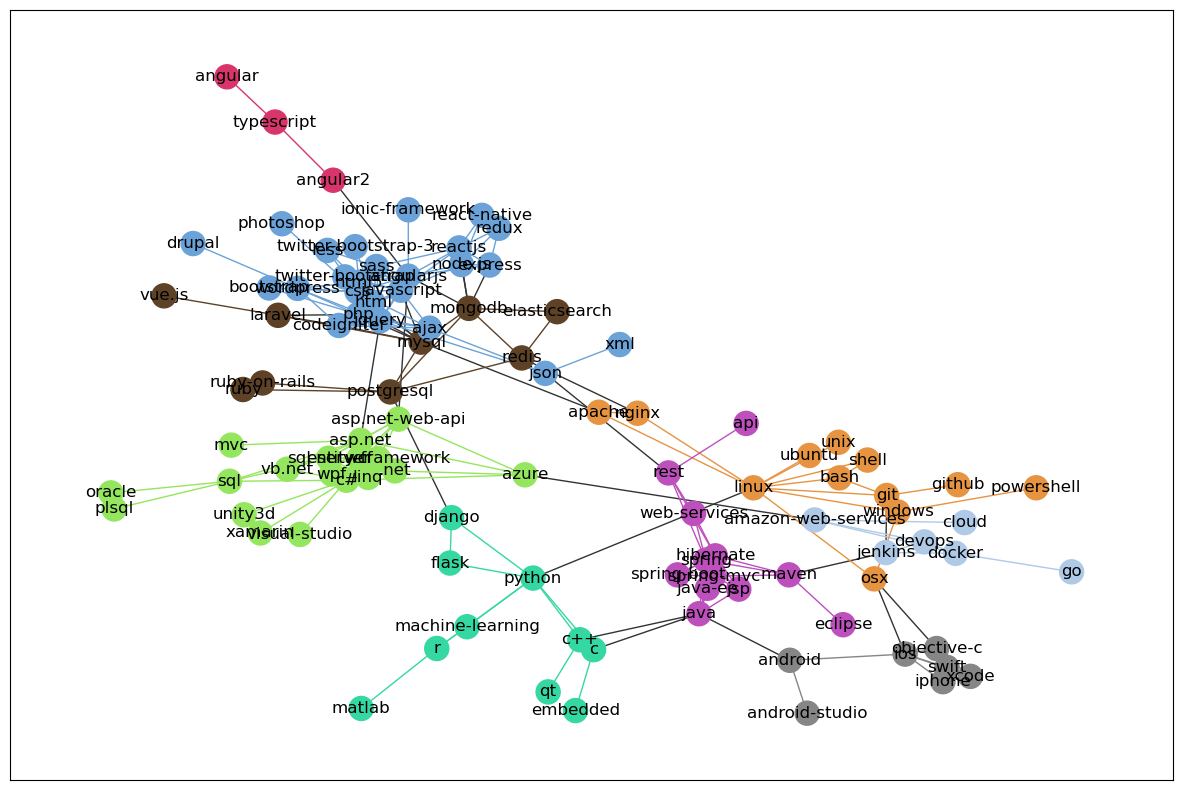

In [46]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(g, communities_clauset_naive)
set_edge_community(g)
#Set community color for nodes
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]
# Set community color for internal edges
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]
position = nx.spring_layout(g)
# Draw external edges
nx.draw_networkx(
    g, pos=position, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)

# Draw nodes and internal edges
nx.draw_networkx(
    g, pos=position, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

plt.show()

In [47]:
communities_clauset == communities_clauset_naive

False

**Commentaire :** 
L'algorithme naive déctecte la présence de neuf (09) communauté, ce qui peut déjà consolider les résultats de l'algorithme de Clauset-Newmann. Toutefois, on remarque que ces deux éléments ne sont pas égaux. Pour rappelle L'algorithme de Clauset-Newman est une amélioration de l'algorithme naïf de Clauset pour la détection de communautés dans les réseaux. Il utilise une méthode de maximum de vraisemblance pour déterminer les paramètres qui décrivent le mieux les communautés dans le réseau. Cette méthode est plus efficace que la méthode naïve de Clauset, qui consiste à maximiser simplement le nombre de liens internes à chaque communauté.

## III-3. Algorithme de Louvrain

In [48]:
communities_louvrain = community.louvain_communities(g)

print("Nous détectons la présence de ", len(communities_louvrain), "communautés")

for i in range(len(communities_louvrain)):
    print("Communauté", str(i+1), ":")
    print(list(communities_louvrain)[i]) 

Nous détectons la présence de  8 communautés
Communauté 1 :
{'twitter-bootstrap', 'json', 'less', 'sass', 'xml', 'php', 'drupal', 'mysql', 'photoshop', 'html5', 'vue.js', 'codeigniter', 'wordpress', 'ajax', 'css', 'jquery', 'javascript', 'bootstrap', 'laravel', 'html', 'twitter-bootstrap-3'}
Communauté 2 :
{'ios', 'swift', 'osx', 'iphone', 'xcode', 'objective-c'}
Communauté 3 :
{'wpf', 'asp.net-web-api', 'asp.net', 'sql-server', 'linq', 'c#', 'entity-framework', 'mvc', 'wcf', 'azure', 'unity3d', 'plsql', 'xamarin', '.net', 'vb.net', 'visual-studio', 'oracle', 'sql'}
Communauté 4 :
{'react-native', 'reactjs', 'typescript', 'ionic-framework', 'mongodb', 'redux', 'elasticsearch', 'angular2', 'node.js', 'redis', 'angular', 'express', 'angularjs'}
Communauté 5 :
{'amazon-web-services', 'docker', 'cloud', 'jenkins', 'go', 'devops'}
Communauté 6 :
{'python', 'ruby', 'matlab', 'flask', 'postgresql', 'c', 'qt', 'django', 'r', 'embedded', 'ruby-on-rails', 'c++', 'machine-learning'}
Communauté 7 

L'algorithme de détection de communauté de Louvrain détecte la présence de huit (08) communautés. L'idée n'étant pas de se répeter, on verra plutôt les différences notables entre les deux algorithmes. En effet, la communauté n°9 composée de "angular", "angular2" et "typescript" ont été ajouté à la communauté n°4 composé de 'express', 'node.js', 'mongodb', 'redux', 'react-native','elasticsearch', 'ionic-framework', 'redis', 'angularjs', 'reactjs' qui n'existait pas précisement, ni avec l'algorithme de clauset-newmann, nidans naive-closness

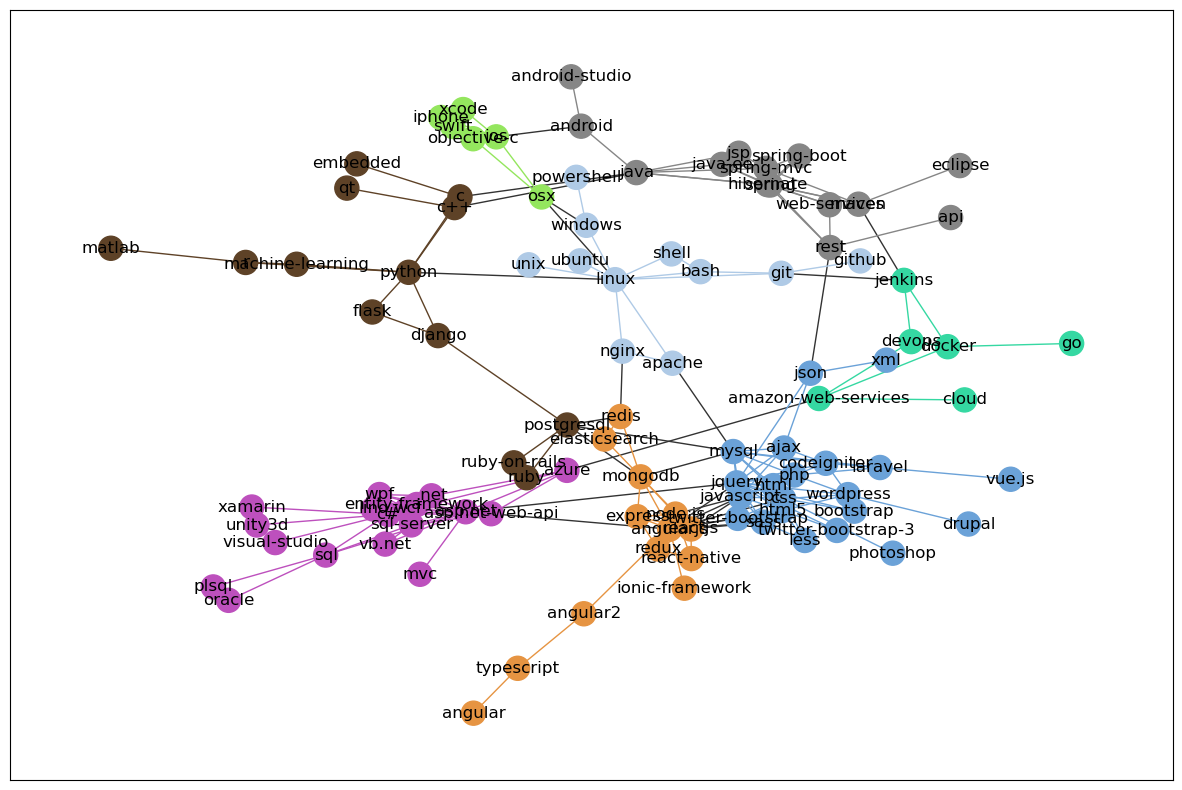

In [49]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(g, communities_louvrain)
set_edge_community(g)
#Set community color for nodes
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]
# Set community color for internal edges
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]
position = nx.spring_layout(g)
# Draw external edges

nx.draw_networkx(
    g, pos=position, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)

nx.draw_networkx(
    g, pos=position, node_color=node_color,
    edgelist=internal, edge_color=internal_color)
plt.show()

# Résumé et commentaire :

| Algorithme                     | Nombre de communautés | Méthode                                 |
|--------------------------------|-----------------------|-----------------------------------------|
| Girvan Newman                  |         2             |mesure de centralité de la betweenness   |
| Clauset-Newmann                |         9             |méthode de maximum de vraisemblance      |
| Clauset-naive                  |         9             |                    -                    |
| Louvrain                       |         8             |maximisation de modularité               | 

Les differentes techniques de détection de communauté, ne donnnent pas les mêmes résultats (cf tableau précédent). Toutefois, il est important de remarquer la proximité entre les résultats données par l'algorithme de Clauset-Newmann et l'algorithme naïf de Clauset. L'algorithme de Louvrain, bien que donnant des résultats différents trouve un nombre de communauté très proche de l'algorithme de Clauset. L'algorithme de Girvan-Newmann quant à lui donne des résultats très différents des trois autres (Deux communautés détectées). Il semble opposé un groupe de langage bien précis à d'autres langages. 